In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rc('font', family='NanumBarunGothic') 

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/세종시/세종시_산업_종사상지위별_종사자수.csv", encoding='cp949')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역별   100 non-null    object
 1   산업별     100 non-null    object
 2   종사상지위별  100 non-null    object
 3   2017    100 non-null    int64 
 4   2018    100 non-null    int64 
 5   2019    100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [6]:
df['산업별'] = df['산업별'].str.split('(').str[0]
df

,행정구역별,산업별,종사상지위별,2017,2018,2019
0,세종,전체 산업,계,99827,115585,125410
1,세종,전체 산업,"자영업자,무급가족",12920,14779,16390
2,세종,전체 산업,상용종사자,72954,82843,89171
3,세종,전체 산업,임시 및 일용근로자,10588,14496,15601
4,세종,전체 산업,기타종사자,3365,3467,4248
...,...,...,...,...,...,...
95,세종,"협회 및 단체, 수리 및 기타 개인 서비스업",계,2812,3559,3966
96,세종,"협회 및 단체, 수리 및 기타 개인 서비스업","자영업자,무급가족",990,1239,1379
97,세종,"협회 및 단체, 수리 및 기타 개인 서비스업",상용종사자,1380,1777,1931
98,세종,"협회 및 단체, 수리 및 기타 개인 서비스업",임시 및 일용근로자,236,300,338


In [7]:
df1 = df[df['종사상지위별'] == '계']
df1 = df1[['산업별', '2017', '2018', '2019']]
df1

,산업별,2017,2018,2019
0,전체 산업,99827,115585,125410
5,"농업, 임업 및 어업",60,70,126
10,광업,122,116,114
15,제조업,19107,20248,20555
20,"전기, 가스, 증기 및 공기조절 공급업",360,483,545
25,"수도, 하수 및 폐기물 처리, 원료 재생업",459,562,601
30,건설업,3766,6350,6216
35,도매 및 소매업,7617,8811,9603
40,운수 및 창고업,2842,3630,4096
45,숙박 및 음식점업,9354,10997,12190


In [8]:
df1['2017년(%)'] = round(df1['2017'][1:].apply(lambda x : (x/df1['2017'][0])*100),2)
df1['2018년(%)'] = round(df1['2018'][1:].apply(lambda x : (x/df1['2018'][0])*100),2)
df1['2019년(%)'] = round(df1['2019'][1:].apply(lambda x : (x/df1['2019'][0])*100),2)
df1

,산업별,2017,2018,2019,2017년(%),2018년(%),2019년(%)
0,전체 산업,99827,115585,125410,NaN,NaN,NaN
5,"농업, 임업 및 어업",60,70,126,0.06,0.06,0.10
10,광업,122,116,114,0.12,0.10,0.09
15,제조업,19107,20248,20555,19.14,17.52,16.39
20,"전기, 가스, 증기 및 공기조절 공급업",360,483,545,0.36,0.42,0.43
25,"수도, 하수 및 폐기물 처리, 원료 재생업",459,562,601,0.46,0.49,0.48
30,건설업,3766,6350,6216,3.77,5.49,4.96
35,도매 및 소매업,7617,8811,9603,7.63,7.62,7.66
40,운수 및 창고업,2842,3630,4096,2.85,3.14,3.27
45,숙박 및 음식점업,9354,10997,12190,9.37,9.51,9.72


In [9]:
df_2017 = df1[['산업별', '2017년(%)']]
df_2019 = df1[['산업별', '2019년(%)']]

In [10]:
df_2017 = df_2017.sort_values(by = '2017년(%)', ascending=False)
df_2017

,산업별,2017년(%)
15,제조업,19.14
75,"공공행정, 국방 및 사회보장 행정",17.23
80,교육 서비스업,10.71
45,숙박 및 음식점업,9.37
35,도매 및 소매업,7.63
85,보건업 및 사회복지 서비스업,7.42
65,"전문, 과학 및 기술 서비스업",5.81
60,부동산업,3.92
70,"사업시설 관리, 사업 지원 및 임대 서비스업",3.91
30,건설업,3.77


In [11]:
df_2019 = df_2019.sort_values(by = '2019년(%)', ascending=False)
df_2019

,산업별,2019년(%)
75,"공공행정, 국방 및 사회보장 행정",17.44
15,제조업,16.39
80,교육 서비스업,11.39
45,숙박 및 음식점업,9.72
85,보건업 및 사회복지 서비스업,8.12
35,도매 및 소매업,7.66
65,"전문, 과학 및 기술 서비스업",5.39
30,건설업,4.96
60,부동산업,3.61
70,"사업시설 관리, 사업 지원 및 임대 서비스업",3.36


In [12]:
df_2017 = df_2017[:-1]
df_2019 = df_2019[:-1]

In [13]:
new_data1 = df_2017['2017년(%)'][9:].sum()
new1 = {'산업별' : '기타', '2017년(%)' : new_data1}
df_2017 = df_2017[:10]
df_2017 = df_2017.append(new1, ignore_index=True)
df_2017

,산업별,2017년(%)
0,제조업,19.14
1,"공공행정, 국방 및 사회보장 행정",17.23
2,교육 서비스업,10.71
3,숙박 및 음식점업,9.37
4,도매 및 소매업,7.63
5,보건업 및 사회복지 서비스업,7.42
6,"전문, 과학 및 기술 서비스업",5.81
7,부동산업,3.92
8,"사업시설 관리, 사업 지원 및 임대 서비스업",3.91
9,건설업,3.77


In [14]:
new_data2 = df_2019['2019년(%)'][9:].sum()
new2 = {'산업별' : '기타', '2019년(%)' : new_data2}
df_2019 = df_2019[:10]
df_2019 = df_2019.append(new2, ignore_index=True)
df_2019

,산업별,2019년(%)
0,"공공행정, 국방 및 사회보장 행정",17.44
1,제조업,16.39
2,교육 서비스업,11.39
3,숙박 및 음식점업,9.72
4,보건업 및 사회복지 서비스업,8.12
5,도매 및 소매업,7.66
6,"전문, 과학 및 기술 서비스업",5.39
7,건설업,4.96
8,부동산업,3.61
9,"사업시설 관리, 사업 지원 및 임대 서비스업",3.36


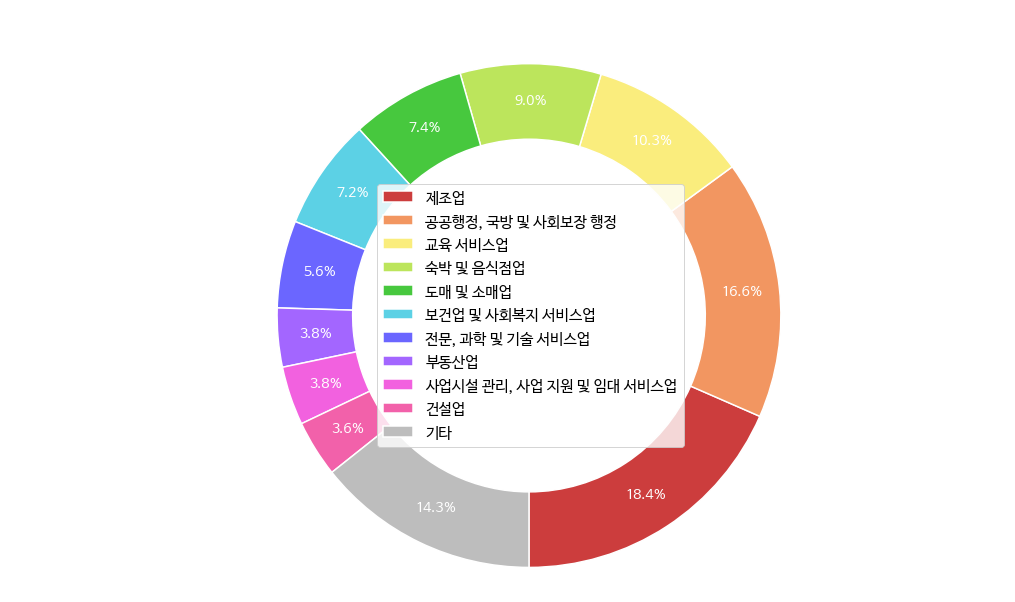

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))

data = {"산업별": df_2017['산업별'], "2017년(%)": df_2017['2017년(%)']}

colors = ["#CC3D3D", "#F29661", "#FAED7D", "#BCE55C", "#47C83E", "#5CD1E5", "#6B66FF", "#A366FF", "#F261DF", "#F261AA", "#BDBDBD"]
df = pd.DataFrame(data)

ax.pie(df_2017['2017년(%)'],
            labels=df_2017['산업별'],
            autopct='%1.1f%%',
            wedgeprops=dict(edgecolor=  "white", linewidth= 1.5, width=0.3),
            startangle=270,
            colors = colors,
            pctdistance=0.85,
            labeldistance=1.2,
            textprops={'color':"w", 'fontsize': 14} )

ax.axis('equal') 
ax.legend(loc = 'center', prop={'size': 15})

plt.show()

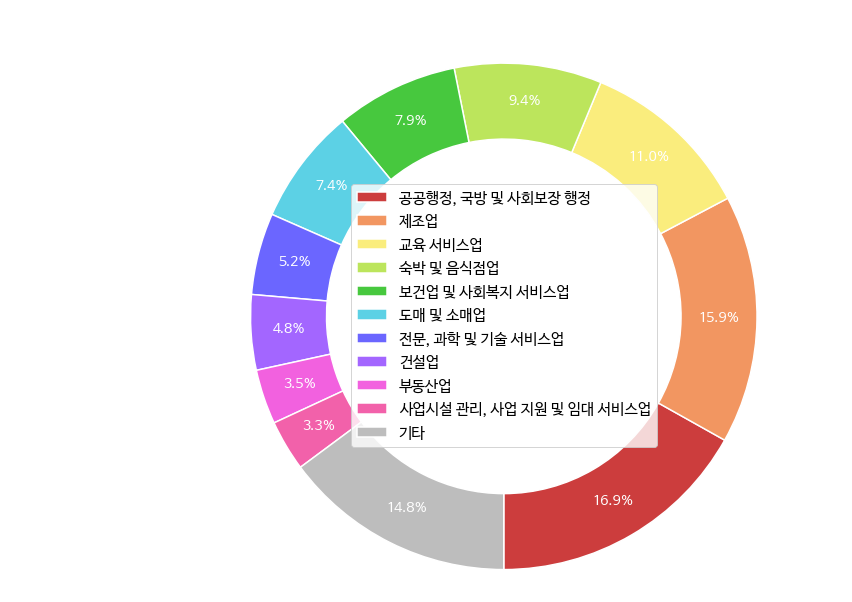

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))

data = {"산업별": df_2019['산업별'], "2019년(%)": df_2019['2019년(%)']}

colors = ["#CC3D3D", "#F29661", "#FAED7D", "#BCE55C", "#47C83E", "#5CD1E5", "#6B66FF", "#A366FF", "#F261DF", "#F261AA", "#BDBDBD"]
df = pd.DataFrame(data)

ax.pie(df_2019['2019년(%)'],
            labels=df_2019['산업별'],
            autopct='%1.1f%%',
            wedgeprops=dict(edgecolor=  "white", linewidth= 1.5, width=0.3),
            startangle=270,
            colors = colors,
            pctdistance=0.85,
            labeldistance=1.2,
            textprops={'color':"w", 'fontsize': 14} )

ax.axis('equal') 
ax.legend(loc = 'center', prop={'size': 15})

plt.show()